# Avocado Data Analysis
---

The aim of this project is to answer the following four questions:

1. Which region are the lowest and highest prices of Avocado?
2. Which region has the lowest and highest demand of Avocado?
3. What is the average avocado volume in each region?
4. Predict the price of Avocado on the various parameter
5. Measure the accuracy of our prediction on test set

# Data Understanding
---

The Avocado dataset was been used in this project.

This dataset contains 13 columns:

1. Date - The date of the observation
2. AveragePrice: the average price of a single avocado
3. Total Volume: Total number of avocados sold
4. Total Bags: Total number  o bags
5. Small Bags: Total number of Small bags
6. Large Bags: Total number of Large bags
7. XLarge Bags: Total number of XLarge bags
8. type: conventional or organic
9. year: the year
10. region: the city or region of the observation
11. 4046: Total number of avocados with PLU 4046 sold
12. 4225: Total number of avocados with PLU 4225 sold
13. 4770: Total number of avocados with PLU 4770 sold

### Importing Libraries
---

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

### First Glance of the data
---

In [5]:
avocado=pd.read_csv('data/avocado.csv')

avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
avocado.drop('Unnamed: 0', axis=1, inplace=True)

---
Remarks :
* The 'Unnamed 0' column is a undefined columns which needs to be removed.
---

In [7]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
#Checking the null values
avocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

---
Remarks:

* No Null value exists
---

### Data Exploration of the numeric columns
---

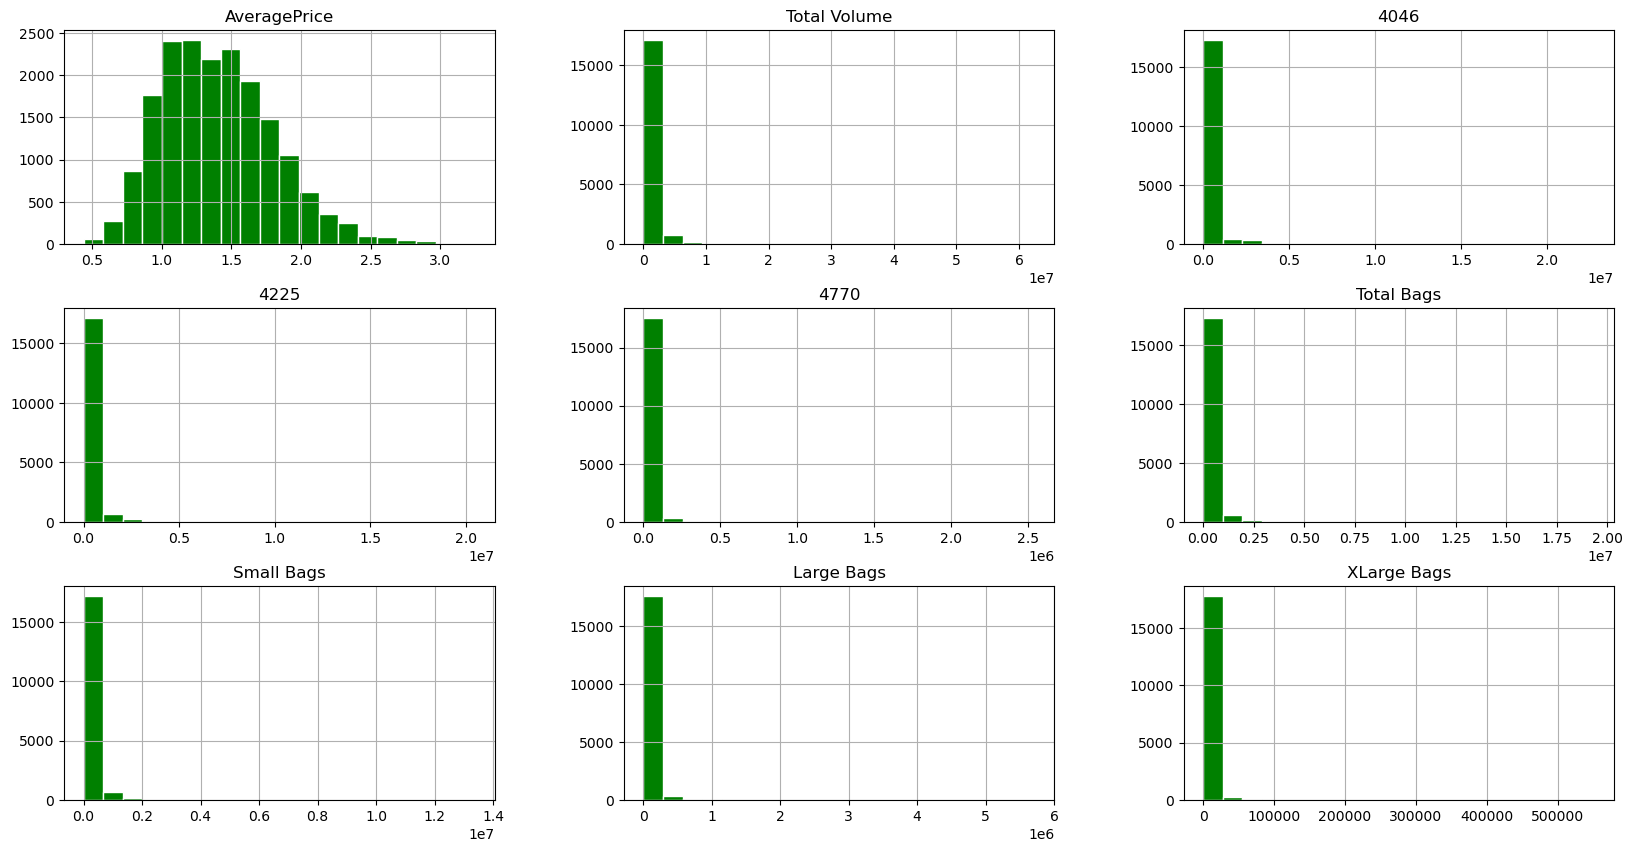

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


In [9]:
# Analysing the Numeric Columns
numberic_col = list(avocado.select_dtypes(['float64', 'int64']).keys())

# removing years
numberic_col.remove('year')

avocado[numberic_col].hist(figsize=(20,10),bins=20, color='green', edgecolor='white')

plt.show()

display(avocado[numberic_col].describe())

---
Remarks:

* AveragePrice is the most normal distribution. Mean and median are really closed, which means the distribution is not severly influenced by outliers. Still, it is a bit skewed to the right, the mean being bigger than the median reflects that. Remaining features.
* The remaining features are severely influenced by outliers, most of the values are located in the first bin of the histograms and the mean is way greater than the median. These features seem to follow the same distribution, which makes sense since the information (quantity sold) is similar
* These kind of distributions, where most of the values are located in lower values and then descends, is really common and could be represented in a different way through log formulas to make it more 'normal' and useful for a model, like regression models, without getting rid of outliers. We will do that during the data preprocessing phase.
---

**Question 1 : Which region has the lowest and highest prices of Avocado?**
---

/var/folders/dx/p_yf86jj0l337t_4zdrmp1f80000gn/T/ipykernel_62456/3758958766.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AveragePrice', y='region', data = avocado, order=expensive.index, ci=None, palette='Greens_r', ax=ax[0])
/var/folders/dx/p_yf86jj0l337t_4zdrmp1f80000gn/T/ipykernel_62456/3758958766.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AveragePrice', y='region', data = avocado, order=cheap.index, ci=None, palette='Greens_r', ax=ax[1])


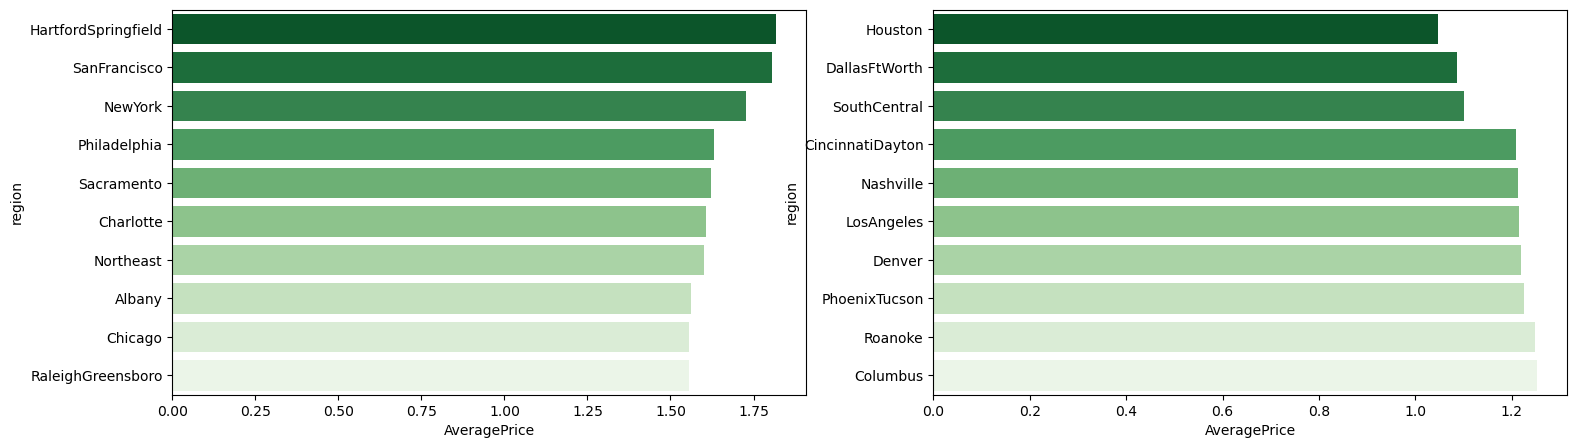

The most expensive avocados can be found in ['HartfordSpringfield', 'SanFrancisco', 'NewYork', 'Philadelphia', 'Sacramento'] 
The cheapest avocados can be found in ['Houston', 'DallasFtWorth', 'SouthCentral', 'CincinnatiDayton', 'Nashville'] 


In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

regionP = avocado.groupby('region')['AveragePrice'].mean()

expensive = regionP.sort_values(ascending = False).iloc[:10]
cheap = regionP.sort_values().iloc[:10]

sns.barplot(x='AveragePrice', y='region', data = avocado, order=expensive.index, ci=None, palette='Greens_r', ax=ax[0])
sns.barplot(x='AveragePrice', y='region', data = avocado, order=cheap.index, ci=None, palette='Greens_r', ax=ax[1])

plt.show()

cheap = pd.DataFrame(cheap).reset_index()
expensive = pd.DataFrame(expensive).reset_index()

print('The most expensive avocados can be found in {} '.format(list(expensive.iloc[:5,0])))
print('The cheapest avocados can be found in {} '.format(list(cheap.iloc[:5,0])))

---
Remarks:

* The most expensive avocados can be found in HartfordSpringfield, SanFrancisco ,NewYork, Philadelphia, Sacramento
* The cheapest avocados can be found in Houston, DallasFtWorth, SouthCentral, CincinnatiDayton, Nashville
---

**Question 2 : Which region has the lowest and highest demand/volume of Avocado?**
---

/var/folders/dx/p_yf86jj0l337t_4zdrmp1f80000gn/T/ipykernel_62456/3728660050.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Total Volume', y='region', data = avoStates, order=most.index, ci=None, palette='Greens_r', ax=ax[0])
/var/folders/dx/p_yf86jj0l337t_4zdrmp1f80000gn/T/ipykernel_62456/3728660050.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Total Volume', y='region', data = avoStates, order=least.index, ci=None, palette='Greens_r', ax=ax[1])


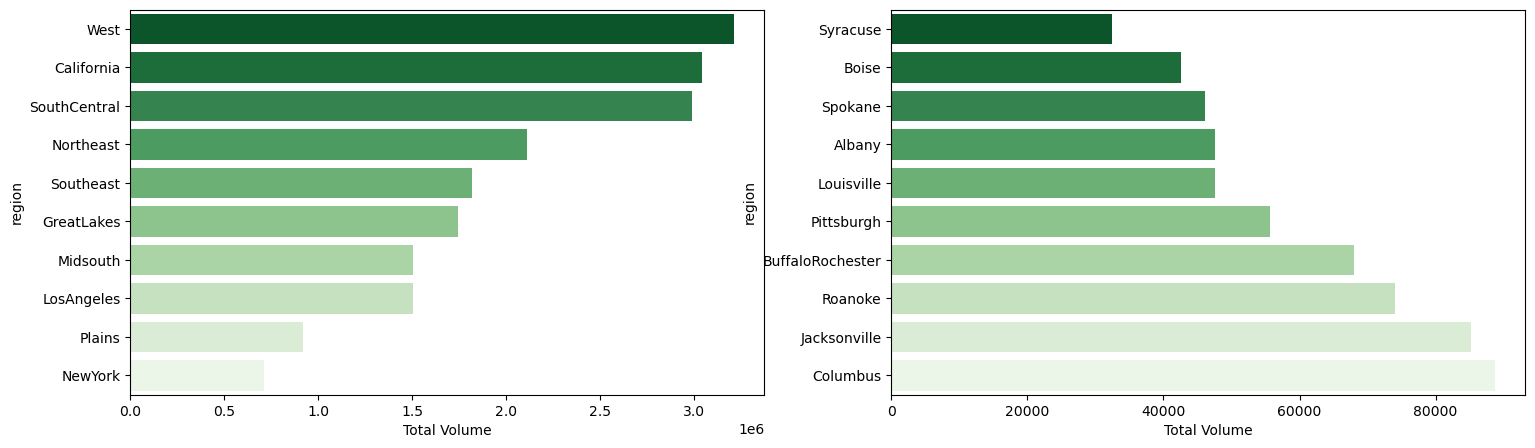

States with the the biggest demand are ['West', 'California', 'SouthCentral', 'Northeast', 'Southeast'] 
States with the least demand are ['Syracuse', 'Boise', 'Spokane', 'Albany', 'Louisville'] 


In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

avoStates = avocado[avocado['region'] !='TotalUS']

regionV = avoStates.groupby('region')['Total Volume'].sum()

most = regionV.sort_values(ascending = False).iloc[:10]
least = regionV.sort_values().iloc[:10]

sns.barplot(x='Total Volume', y='region', data = avoStates, order=most.index, ci=None, palette='Greens_r', ax=ax[0])
sns.barplot(x='Total Volume', y='region', data = avoStates, order=least.index, ci=None, palette='Greens_r', ax=ax[1])

plt.show()

most = pd.DataFrame(most).reset_index()
least = pd.DataFrame(least).reset_index()

print('States with the the biggest demand are {} '.format(list(most.iloc[:5,0])))
print('States with the least demand are {} '.format(list(least.iloc[:5,0])))

---
Remarks:

* States with the the biggest demand are West, California, SouthCentral, Northeast, Southeast
* States with the least demand are Syracuse, Boise, Spokane, Albany, Louisville
---

### Boxplot for checking the column 'Total Volume'
---

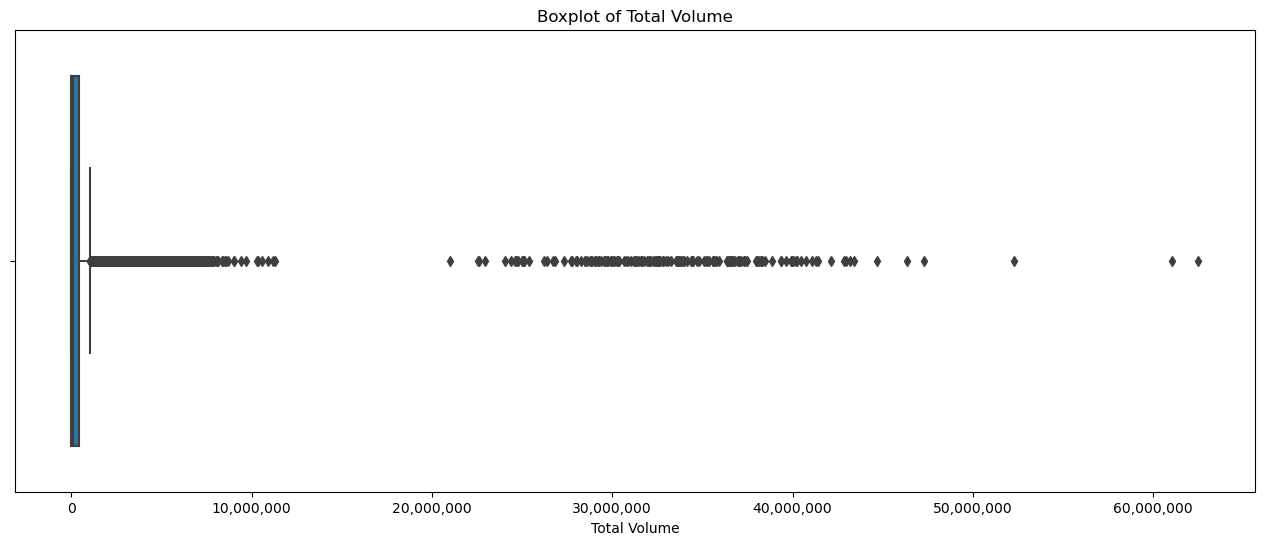

In [12]:
from matplotlib.ticker import FuncFormatter

# Create the boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(x='Total Volume', data=avocado)

# Function to format x-axis ticks as integers
def format_func(value, tick_number):
    return f'{int(value):,}'

# Apply the formatting function to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

# Adding titles and labels
plt.title('Boxplot of Total Volume')
plt.xlabel('Total Volume')

# Show the plot
plt.show()

### Boxplot for checking the column 'Average Price'
---

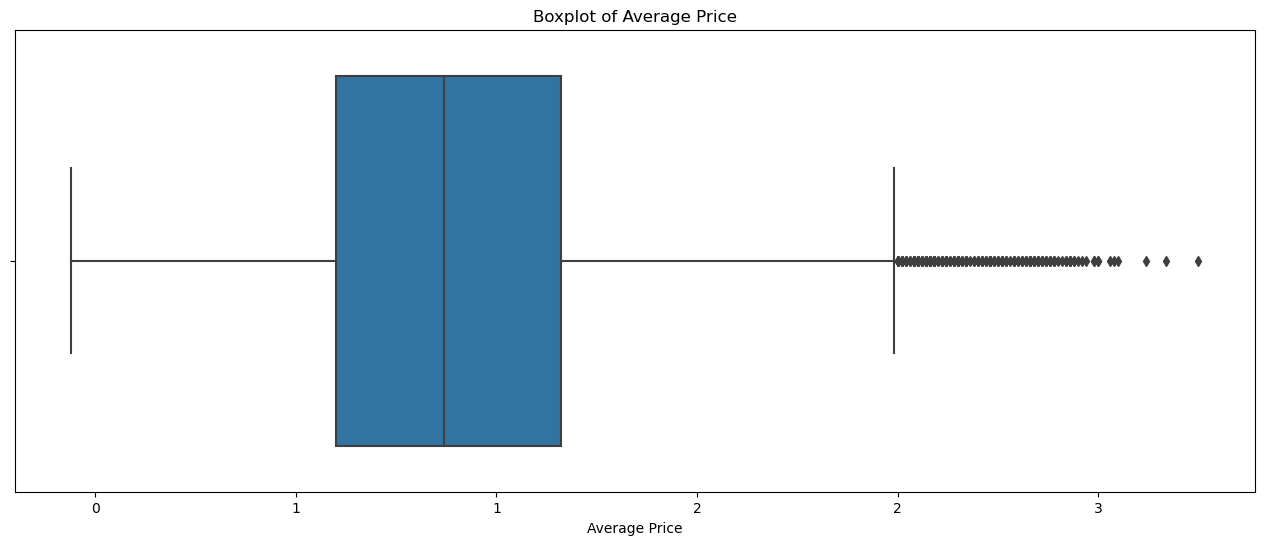

In [13]:
from matplotlib.ticker import FuncFormatter

# Create the boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(x='AveragePrice', data=avocado)

# Function to format x-axis ticks as integers
def format_func(value, tick_number):
    return f'{int(value):,}'

# Apply the formatting function to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

# Adding titles and labels
plt.title('Boxplot of Average Price')
plt.xlabel('Average Price')

# Show the plot
plt.show()

### Data Exploration of the categorical columns
---

In [14]:
# Investigate unique values in categorical columns
cat_col = avocado.select_dtypes('object').columns
for col in cat_col:
    print('Unique values in "{}" column count: {}'.format(col, avocado[col].nunique()))
    print(avocado[col].unique())
    print('-'*30)

Unique values in "Date" column count: 169
['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '2016-11-06'
 '2016-10-30' '2016-10-23' '2016-10-16' '2016-10-09' '2016-10-02'
 '2016-09-25' '2016-09-18' '2016-09-11' '2016-09-04' '2016-08-28'
 '2016-08-21' '2016-08-14' '2016-0

### Barplot to see the distribution frequency of different type of Avocado
---

In [15]:
category_counts_type = avocado['type'].value_counts()
category_counts_type

conventional    9126
organic         9123
Name: type, dtype: int64

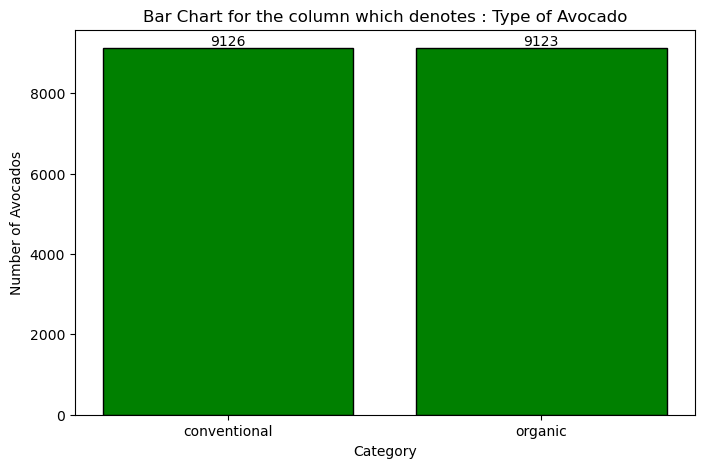

In [16]:
# Frequency of 'type' unique value
category_counts_type = avocado['type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 5))  # Set the figure size
bars = plt.bar(category_counts_type.index, category_counts_type.values, color='green', edgecolor='black')

# Adding titles and labels
plt.title('Bar Chart for the column which denotes : Type of Avocado')
plt.xlabel('Category')
plt.ylabel('Number of Avocados')

# Annotating bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')


# Displaying the bar chart
plt.show()

---
Remarks : 
* We have two classes which are almost equal in number.
---

### Barplot to see the frequency of 'Types of Avacado' with respect Average Price and Total Volume
---

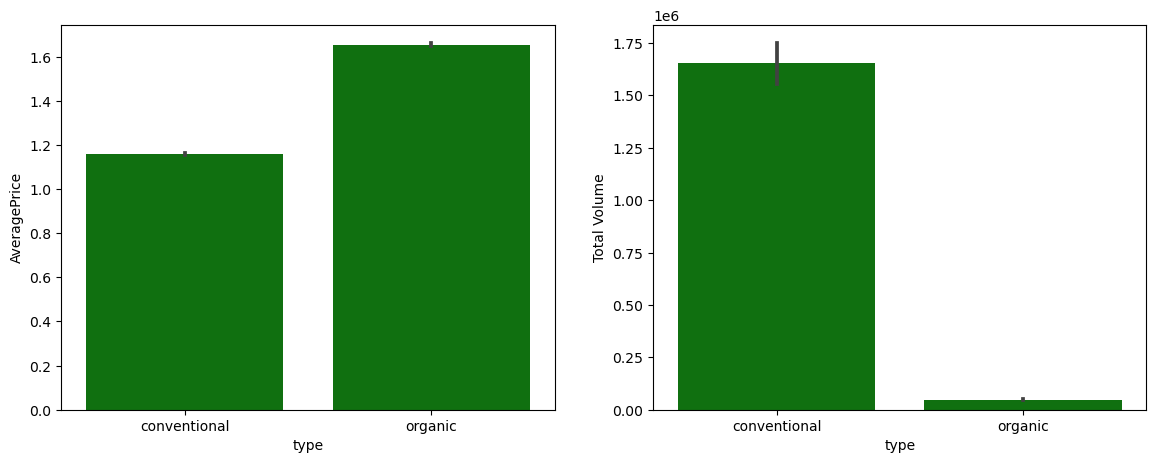

In [17]:
# Barplots

fig, ax = plt.subplots(1, 2, figsize=(14,5))


sns.barplot(x='type', y='AveragePrice', data=avocado, color='green', ax=ax[0])
sns.barplot(x='type', y='Total Volume', data=avocado, color='green', ax=ax[1])
plt.show()

In [18]:
# Mean and Sum of Average Price and Volume with respect to Type of Avocado
display(avocado.groupby('type')['AveragePrice'].mean())
display(avocado.groupby('type')['Total Volume'].sum())

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

---
Remarks : 
* So given that the two type of avocado are almost perfectly distributed  we see from the above plot as well as the above stats that conventional avocado is cheaper than organic, but more shockingly, conventional avocado having a way more demand than organic avocado.
---

In [19]:
# Frequency of 'region' unique value
print(avocado['region'].value_counts())

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

---
Remarks : 
* This 'region' Feature have 54 unique values which are uniformly distributed through the dataset.
---

### Analysing the Frequency the total dataset with respect to 'Date' Column
---

Remarks:
We have two columns which are 'Date' and 'year', being year the extracted year of date. To make the analysis easier, let's extract day and month out of 'Date' and see each value separately. That way, we are also going to have two more potentially usefull columns: day and month.

In [20]:
from datetime import datetime

avocado_copy = avocado.copy()

avocado_copy['Date'] = avocado_copy['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
avocado_copy['month'] = avocado_copy['Date'].dt.month
avocado_copy['day'] = avocado_copy['Date'].dt.day
# monday = 0
avocado_copy['day of week'] = avocado_copy['Date'].dt.dayofweek
dates = ['year', 'month', 'day', 'day of week']
avocado_copy[dates]

,year,month,day,day of week
0,2015,12,27,6
1,2015,12,20,6
2,2015,12,13,6
3,2015,12,6,6
4,2015,11,29,6
...,...,...,...,...
18244,2018,2,4,6
18245,2018,1,28,6
18246,2018,1,21,6
18247,2018,1,14,6


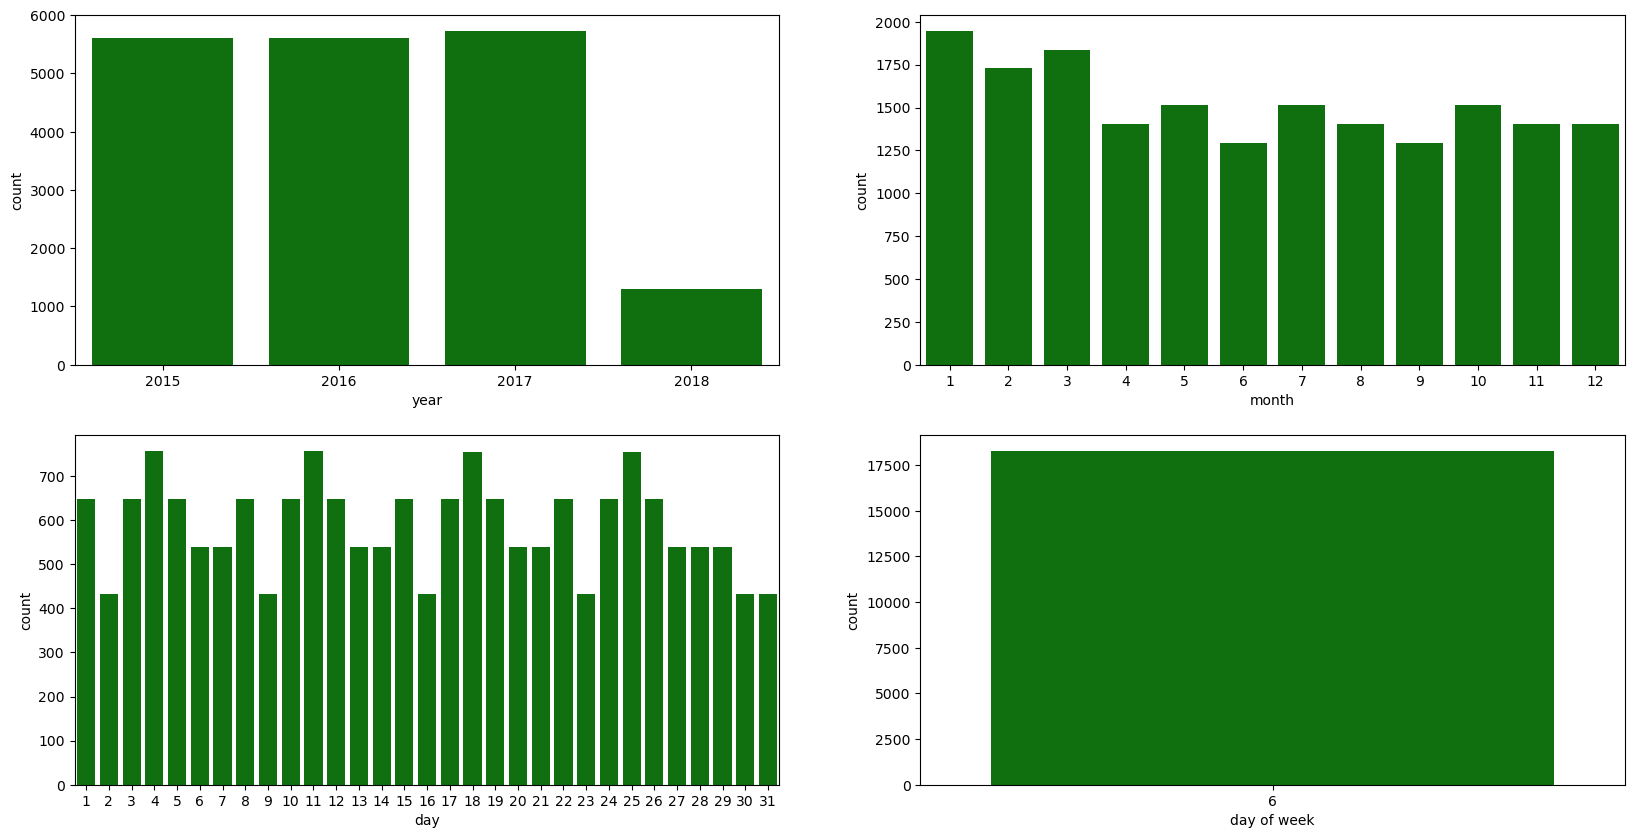

In [21]:
#Plotting the above 4 columns

fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.countplot(x='year', data=avocado_copy, ax=ax[0,0], color='Green')
sns.countplot(x='month', data=avocado_copy, ax=ax[0,1], color='Green')
sns.countplot(x='day', data=avocado_copy, ax=ax[1,0], color='Green')
sns.countplot(x='day of week', data=avocado_copy, ax=ax[1,1], color='Green')

plt.show()

----
Remarks:

**Year**

* 2015, 2016, 2017 have almost the same values
* 2018 is the lowest, that should have ended in the beginning of 2018

**Month**

* Shows a descending pattern. The first months have more entry and then it decreases

**Day and Day of week**

* We can see that the day chart has a repeating trend, and this is because of the day that the data was always recorded: day 6 (Sunday). The data was, therefore, recorded weekly, 'day of week' becomes redundant and we can eliminate it.
---

### Trend of the data with respect to average price and total volume a per each quarter
---

We saw the 'Date' entry count showed a decreasing trend of total frenquency of data from the beginning of the year to the end. We can check if there is a pattern in the price and volume across the year

/var/folders/dx/p_yf86jj0l337t_4zdrmp1f80000gn/T/ipykernel_62456/1497451451.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='quarter', y='Total Volume', data=avocado_copy, palette='Greens_r', ci=None, ax=ax[0])
/var/folders/dx/p_yf86jj0l337t_4zdrmp1f80000gn/T/ipykernel_62456/1497451451.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='quarter', y='AveragePrice', data=avocado_copy, palette='Greens_r', ci=None, ax=ax[1])


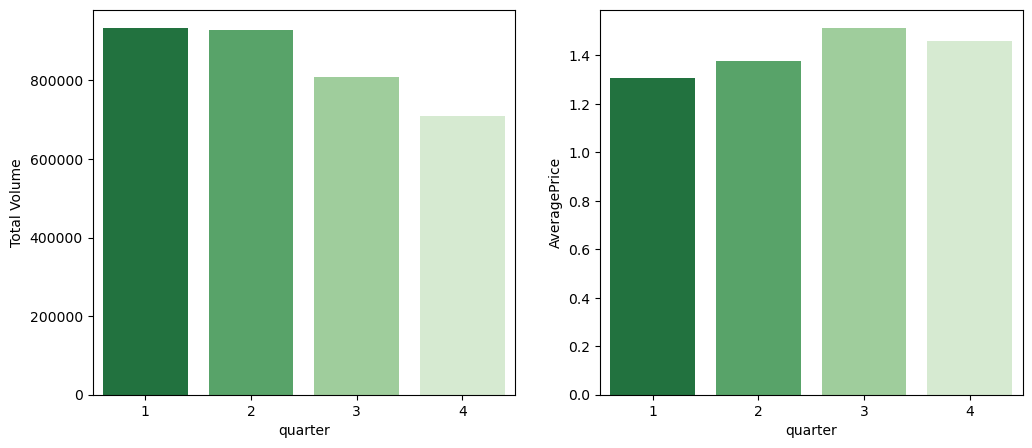

,Total Volume,AveragePrice
quarter,,
1,933371.788252,1.306605
2,928527.872254,1.375033
3,808062.047498,1.512913
4,710750.427752,1.458588


In [22]:
from datetime import datetime

fig, ax = plt.subplots(1, 2, figsize=(12,5))


# Convert the 'Date' column to datetime objects
avocado_copy['Date'] = pd.to_datetime(avocado_copy['Date'], format='%Y-%m-%d')

avocado_copy['quarter'] = avocado_copy['Date'].dt.quarter


sns.barplot(x='quarter', y='Total Volume', data=avocado_copy, palette='Greens_r', ci=None, ax=ax[0])
sns.barplot(x='quarter', y='AveragePrice', data=avocado_copy, palette='Greens_r', ci=None, ax=ax[1])


plt.show()

quarter = avocado_copy.groupby('quarter')[['Total Volume', 'AveragePrice']].mean()
display(quarter)

---
Remarks:
* We do see a trend.

* So we see that in the first quarter of the year sales are better than in other quarters and prices are the lowest.

* After the first quarter, sales decrease and prices grow. Given the popularity of avocados, businesses should be considering importing more avocados in the first quarter and sell it in the next quarter.

* It also justifies the price v/s avaibility concept of economics. People are eager to pay more when the volume in the market is less*
---

### Correlation Matrix
---

/var/folders/dx/p_yf86jj0l337t_4zdrmp1f80000gn/T/ipykernel_62456/2285065171.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(avocado.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, ax=ax)


Text(0.5, 1.0, 'Heat map')

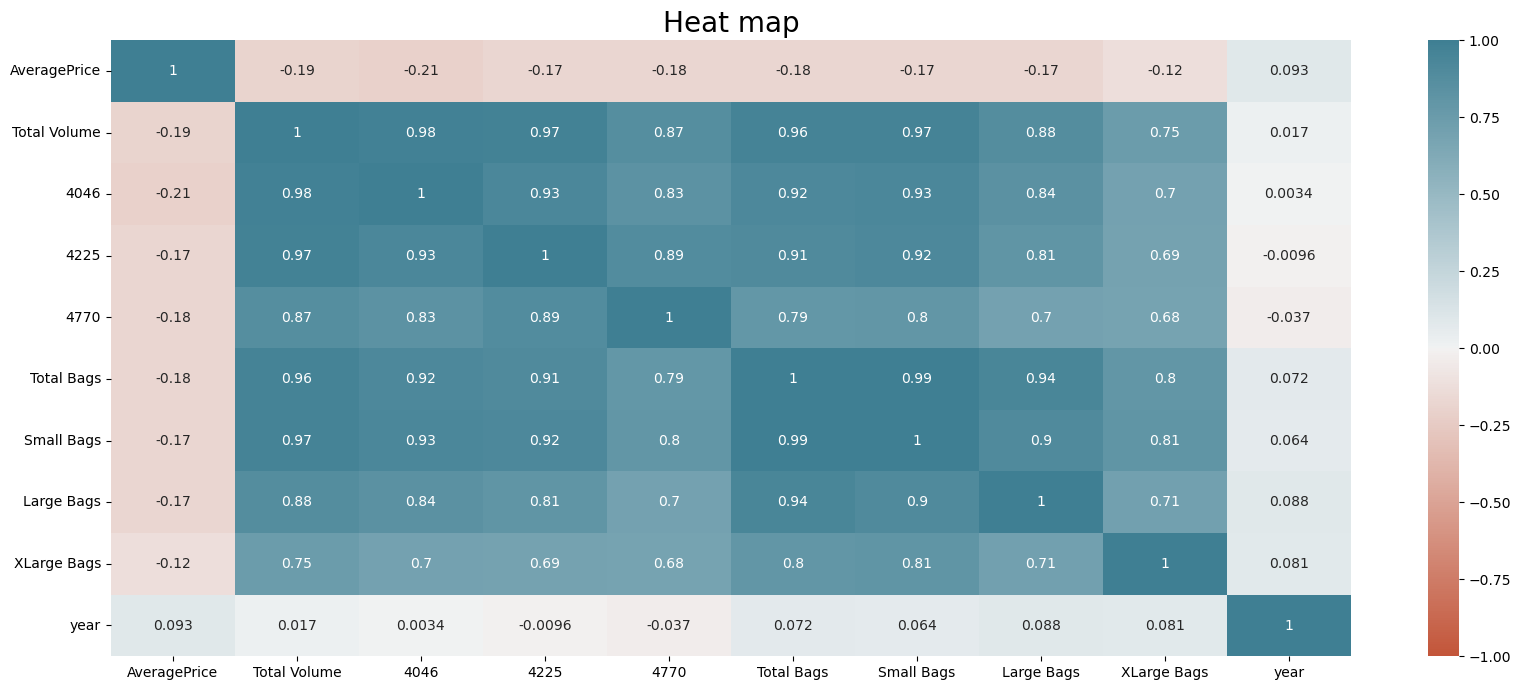

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(20,8))

sns.heatmap(avocado.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, ax=ax)
ax.set_title('Heat map', fontsize=20)

---
Remarks:
* We see the Total Volume is correlated with Columns : 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags. This is obviously because those columns are specific measures of Volume. Like the Total Bags sold will correspond to increase in Total Volume sold.

* The interesting thing is Average Price (our target variable) is not showing a strong correlation with any column. We need to check plotting average price vs other columns to see the pattern and understand why the correlation is so week.
---

### Plot 'AveragePrice' Vs various columns
---

<Axes: xlabel='Total Volume', ylabel='AveragePrice'>

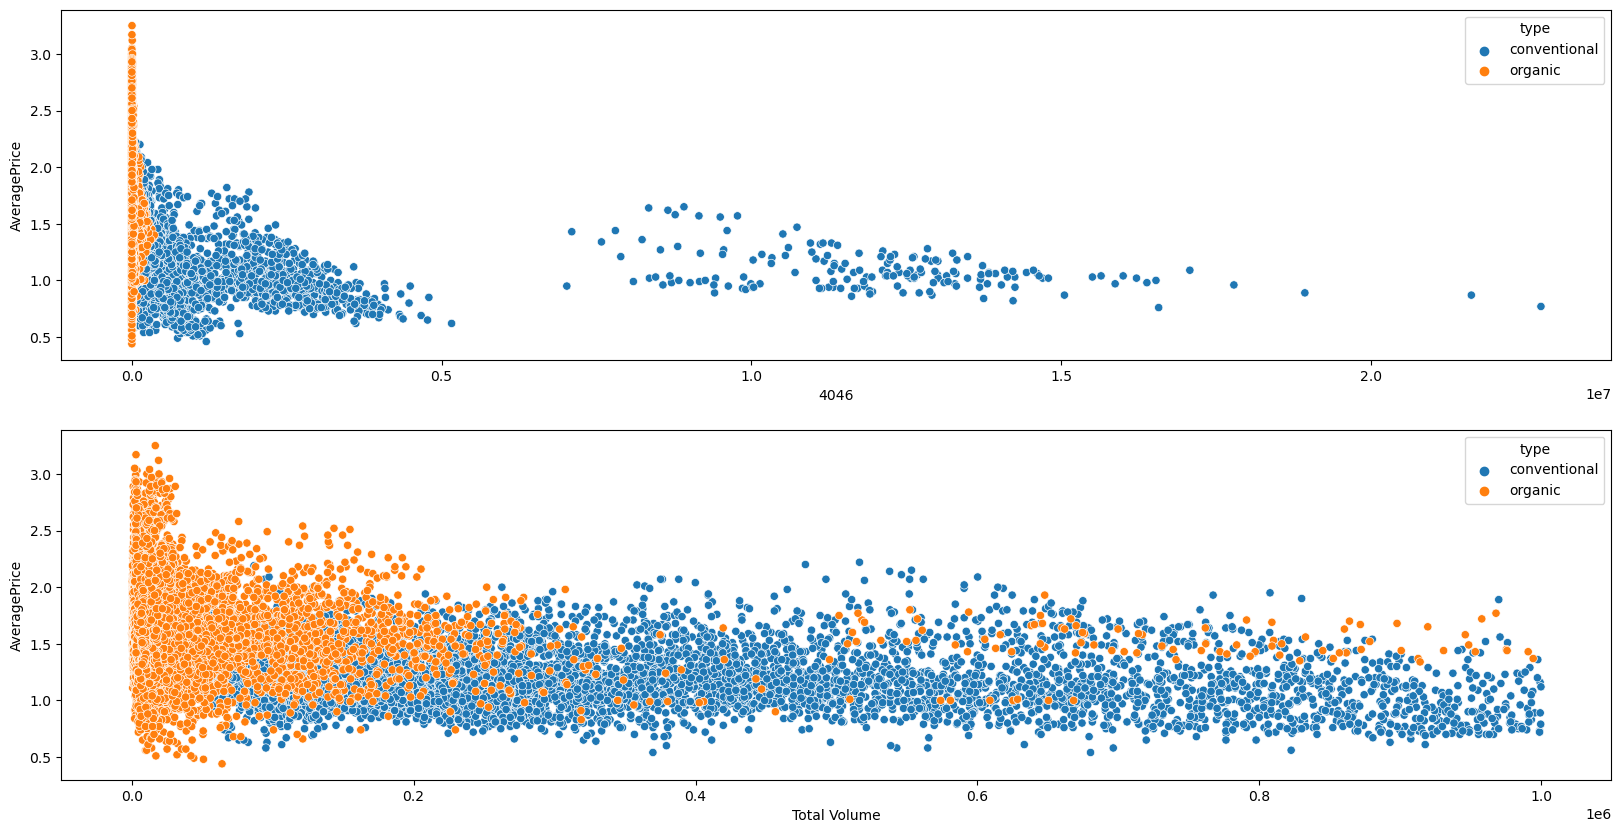

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))

#removing the outliers in Total Volume
avo_o = avocado[avocado['Total Volume']<1000000]

sns.scatterplot(x='4046', y='AveragePrice', data=avocado, hue='type', ax=ax[0])

# Plotting with the dataset 'avo_o' in which we have removed the outliers from 'Total Volume'
sns.scatterplot(x='Total Volume', y='AveragePrice', data=avo_o, hue='type', ax=ax[1])

---
Remarks:
**With and without outliers present we see a pattern that: We can't take the outliers out since all of them correspond to the conventional type, which means that conventional avocados sell way more than organic avocados**
---

## Data Preprocessing
---

I will take the columns : Total Volume, 4770, large bags

In [25]:
avocado_copy1 = avocado.copy()
avocado_copy1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [26]:
avocado_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


drop : date,region,4046,4225,total bags,small bags,Xlarge abgs

In [27]:
avocado_copy1 = avocado_copy1.drop(columns=['Date', 'region','XLarge Bags','Small Bags','Total Bags','4046','4225'])

In [28]:
avocado_copy1.head()

,AveragePrice,Total Volume,4770,Large Bags,type,year
0,1.33,64236.62,48.16,93.25,conventional,2015
1,1.35,54876.98,58.33,97.49,conventional,2015
2,0.93,118220.22,130.50,103.14,conventional,2015
3,1.08,78992.15,72.58,133.76,conventional,2015
4,1.28,51039.60,75.78,197.69,conventional,2015


In [29]:
avocado_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4770          18249 non-null  float64
 3   Large Bags    18249 non-null  float64
 4   type          18249 non-null  object 
 5   year          18249 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 855.5+ KB


### One Hot Encoding of column 'type'
---

In [30]:
# Checking unique values as -
print(f"Unique values in type are {avocado_copy1['type'].unique()}.")

Unique values in type are ['conventional' 'organic'].


In [31]:
# Replaceing 'Other_Segment_description', 'Meridian, Idaho' with '0', '1' with respectively as -
avocado_copy1['type'].replace(['conventional', 'organic'], ['0', '1'], inplace = True)

In [32]:
# Display Value counts for 'Other_Segment_description', 'Meridian, Idaho' respectively as -
print(">>> Type Column - ")
print("-" * 40)
print(avocado_copy1['type'].value_counts())
print('\n')

>>> Type Column - 
----------------------------------------
0    9126
1    9123
Name: type, dtype: int64




In [33]:
avocado_copy1.head()

,AveragePrice,Total Volume,4770,Large Bags,type,year
0,1.33,64236.62,48.16,93.25,0,2015
1,1.35,54876.98,58.33,97.49,0,2015
2,0.93,118220.22,130.50,103.14,0,2015
3,1.08,78992.15,72.58,133.76,0,2015
4,1.28,51039.60,75.78,197.69,0,2015


In [34]:
# Split the training dataset (data_filtered_copy1) into X and y

X = avocado_copy1.drop(['AveragePrice'], axis=1)
y = avocado_copy1['AveragePrice']

In [35]:
X

,Total Volume,4770,Large Bags,type,year
0,64236.62,48.16,93.25,0,2015
1,54876.98,58.33,97.49,0,2015
2,118220.22,130.50,103.14,0,2015
3,78992.15,72.58,133.76,0,2015
4,51039.60,75.78,197.69,0,2015
...,...,...,...,...,...
18244,17074.83,0.00,431.85,1,2018
18245,13888.04,0.00,324.80,1,2018
18246,13766.76,727.94,42.31,1,2018
18247,16205.22,727.01,50.00,1,2018


In [36]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [37]:
X_train_encoded = pd.get_dummies(X, prefix=['type_'], drop_first=True)
X_train_encoded

,Total Volume,4770,Large Bags,year,type__1
0,64236.62,48.16,93.25,2015,0
1,54876.98,58.33,97.49,2015,0
2,118220.22,130.50,103.14,2015,0
3,78992.15,72.58,133.76,2015,0
4,51039.60,75.78,197.69,2015,0
...,...,...,...,...,...
18244,17074.83,0.00,431.85,2018,1
18245,13888.04,0.00,324.80,2018,1
18246,13766.76,727.94,42.31,2018,1
18247,16205.22,727.01,50.00,2018,1


In [38]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  18249 non-null  float64
 1   4770          18249 non-null  float64
 2   Large Bags    18249 non-null  float64
 3   year          18249 non-null  int64  
 4   type__1       18249 non-null  uint8  
dtypes: float64(3), int64(1), uint8(1)
memory usage: 588.2 KB


### Normalizing the Columns : Total Volume, 4770, Large Bags
---

0.08809841291839542

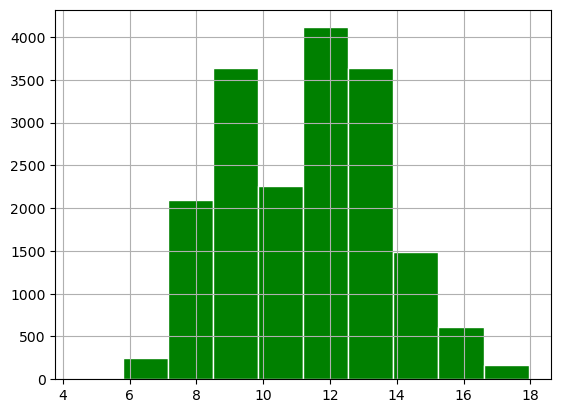

In [39]:
# Column 'Total Volume'
X_train_encoded['Total Volume'] = np.log(X_train_encoded['Total Volume'] + 1)
X_train_encoded['Total Volume'].hist(color='green', edgecolor='white')
X_train_encoded['Total Volume'].skew()

0.09998624691203421

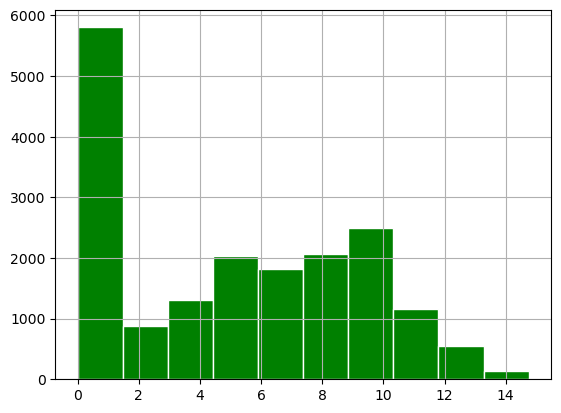

In [40]:
# Column '4770'
X_train_encoded['4770'] = np.log(X_train_encoded['4770'] + 1)
X_train_encoded['4770'].hist(color='green', edgecolor='white')
X_train_encoded['4770'].skew()

-0.547765425616728

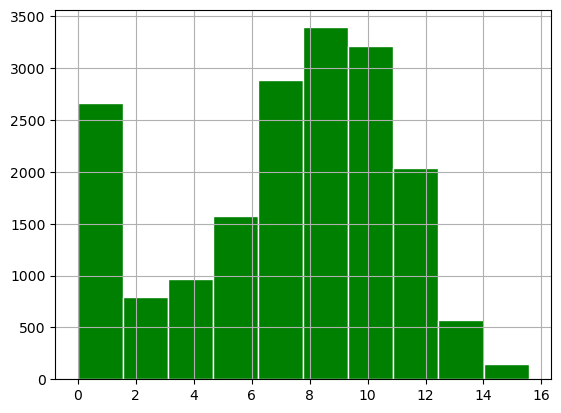

In [41]:
# Column 'Large Bags'
X_train_encoded['Large Bags'] = np.log(X_train_encoded['Large Bags'] + 1)
X_train_encoded['Large Bags'].hist(color='green', edgecolor='white')
X_train_encoded['Large Bags'].skew()

In [42]:
X_train_encoded.head()

,Total Volume,4770,Large Bags,year,type__1
0,11.070344,3.895080,4.545951,2015,0
1,10.912867,4.083115,4.589955,2015,0
2,11.680313,4.879007,4.645736,2015,0
3,11.277116,4.298373,4.903495,2015,0
4,10.840377,4.340944,5.291746,2015,0


### Sampling the dataset in Training set and Test set
---

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_encoded, y, test_size=0.3, random_state=86)
print(f"Shape of - X_train {X_train.shape}, X_test {X_test.shape}, y_train {y_train.shape}, y_test {y_test.shape}.")

Shape of - X_train (12774, 5), X_test (5475, 5), y_train (12774,), y_test (5475,).


### Model Training : Linear Regression
---

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Extracting coefficients, intercept, and performance metrics
slope = model.coef_[0]
intercept = model.intercept_
r_squared = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Display summary information
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"R-squared: {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Intercept: -139.5107686358554
Slope: -0.0373558704524282
R-squared: 0.45019352450983596
Mean Squared Error (MSE): 0.0915345437548659
Root Mean Squared Error (RMSE): 0.30254676292247107


---
#### We see the R squared value for the linear regression : 0.4506283582138524, which is not a fairly good model. We can improve this model taking in account other features and different other ways of feature extraction.
---